In [1]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

# For Modeling 
from sklearn.tree import DecisionTreeClassifier

# #For Model Evaluation 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score



In [2]:
df = pd.read_csv('df4.csv')

### Preparing DataFrame

In [3]:
df = df.drop(columns= ['Unnamed: 0', 'name'])

In [4]:
df.columns = ['category_id', 'cause_id', 'zipcode', 'current_score', 'current_rating', 'accountability_score', 'accountability_rating', 'org_assets', 'org_income', 'fin_score', 'fin_rating', 
              'southeast', 'northeast', 'midwest', 'southwest', 'west', 'arts_culture_humanities','community_development', 'education', 'environment', 'health', 'human_services', 'human_and_civil_rights', 
                'international', 'religion', 'research_and_public_policy', '509(a)(3)_type_ii', '509(a)(3)_type_iii', 'church_170(b)(1)(a)(i)', 'governmental_unit_170(b)(1)(a)(v)', 'hospital_or_medical_research_organization_170(b)(1)(a)(iii)',
               '509(a)(2)', '170(b)(1)(a)(iv)', '170(b)(1)(a)(vi)', '509(a)(3)', 'private_non-operating_foundation', 'school_170(b)(1)(a)(ii)', 'central_church', 'central_not_a_church501(c)(1)',
               'independent', 'intermediate', 'subordinate', 'animal_rights_welfare_and_services', 'botanical_gardens_parks_and_nature_centers', 'children_and_family_services', 'community_foundations',
               'development_and_relief_services', 'diseases_disorders_and_disciplines', 'early_childhood_programs_and_services', 'education_policy_and_reform', 'environmental_protection_and_conservation',
               'food_banks_pantries_and_distribution', 'homeless_services', 'housing_and_neighborhood_development', 'humanitarian_relief_supplies', 'international_peace_security_and_affairs', 
               'jewish_federations', 'libraries_historical_societies_and_landmark_preservation', 'medical_research', 'multipurpose_human_service_organizations', 'museums', 'non-medical_science_&_technology_research',
               'patient_and_family_support', 'performing_arts', 'public_broadcasting_and_media', 'religious_activities', 'religious_media_and_broadcasting', 'rescue_missions', 'scholarship_and_financial_support', 
               'social_services', 'social_and_public_policy_research', 'special_education', 'treatment_and_prevention_services', 'united_ways', 'wildlife_conservation', 'youth_development,_shelter,_and_crisis_services',
               'youth_education_programs_and_services', 'zoos_and_aquariums']

In [6]:
df['fin_rating'] = df['fin_rating'].replace([1, 2, 3, 4], [0, 0, 1, 1])

In [18]:
df.isna().sum()

category_id                                                      0
cause_id                                                         0
zipcode                                                          0
current_score                                                    0
current_rating                                                   0
accountability_score                                             0
accountability_rating                                            0
org_assets                                                     117
org_income                                                     117
fin_score                                                        0
fin_rating                                                       0
southeast                                                        0
northeast                                                        0
midwest                                                          0
southwest                                                     

<AxesSubplot:>

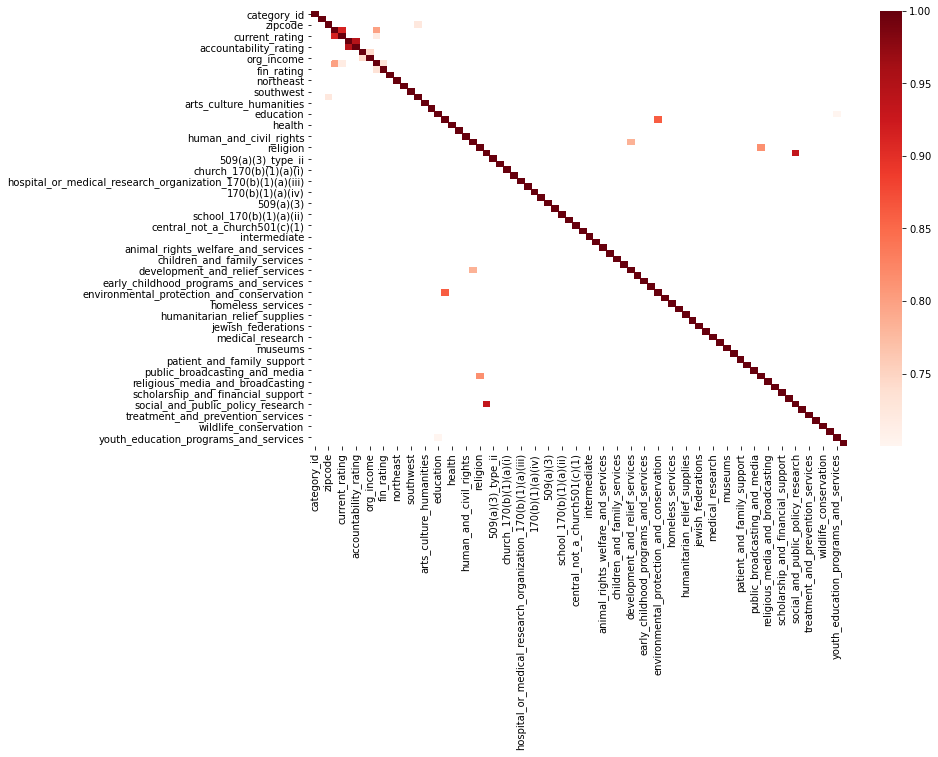

In [50]:
corr=df.corr()

kot = corr[corr>=.7]
plt.figure(figsize=(12,8))

sns.heatmap(kot, cmap="Reds")

# Baseline Model

In [42]:
features = ['current_rating', 'accountability_rating',
              'southeast', 'northeast', 'midwest', 'southwest', 'west', 'arts_culture_humanities','community_development', 'education', 'environment', 'health', 'human_services', 'human_and_civil_rights', 
                'international', 'religion', 'research_and_public_policy', '509(a)(3)_type_ii', '509(a)(3)_type_iii', 'church_170(b)(1)(a)(i)', 'governmental_unit_170(b)(1)(a)(v)', 'hospital_or_medical_research_organization_170(b)(1)(a)(iii)',
               '509(a)(2)', '170(b)(1)(a)(iv)', '170(b)(1)(a)(vi)', '509(a)(3)', 'private_non-operating_foundation', 'school_170(b)(1)(a)(ii)', 'central_church', 'central_not_a_church501(c)(1)',
               'independent', 'intermediate', 'subordinate', 'animal_rights_welfare_and_services', 'botanical_gardens_parks_and_nature_centers', 'children_and_family_services', 'community_foundations',
               'development_and_relief_services', 'diseases_disorders_and_disciplines', 'early_childhood_programs_and_services', 'education_policy_and_reform', 'environmental_protection_and_conservation',
               'food_banks_pantries_and_distribution', 'homeless_services', 'housing_and_neighborhood_development', 'humanitarian_relief_supplies', 'international_peace_security_and_affairs', 
               'jewish_federations', 'libraries_historical_societies_and_landmark_preservation', 'medical_research', 'multipurpose_human_service_organizations', 'museums', 'non-medical_science_&_technology_research',
               'patient_and_family_support', 'performing_arts', 'public_broadcasting_and_media', 'religious_activities', 'religious_media_and_broadcasting', 'rescue_missions', 'scholarship_and_financial_support', 
               'social_services', 'social_and_public_policy_research', 'special_education', 'treatment_and_prevention_services', 'united_ways', 'wildlife_conservation', 'youth_development,_shelter,_and_crisis_services',
               'youth_education_programs_and_services', 'zoos_and_aquariums']

### Logistic Regression

In [43]:
X= df[features]
y= df['fin_rating']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

logreg = LogisticRegression().fit(X_train, y_train)
y_pred = logreg.predict(X_test)

accuracy_score(y_pred, y_test)

/Users/aratliff/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8512014787430684

### Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
print(accuracy_score(pred, y_test))

0.8382624768946395


/Users/aratliff/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [46]:
importance = rf.feature_importances_
for i,v in enumerate(importance):
    print('feature:%0d, score: %.5f' %(i,v))

feature:0, score: 0.55252
feature:1, score: 0.14037
feature:2, score: 0.02019
feature:3, score: 0.01826
feature:4, score: 0.01656
feature:5, score: 0.01289
feature:6, score: 0.02112
feature:7, score: 0.00509
feature:8, score: 0.00397
feature:9, score: 0.00334
feature:10, score: 0.00285
feature:11, score: 0.00342
feature:12, score: 0.00966
feature:13, score: 0.00527
feature:14, score: 0.00308
feature:15, score: 0.00421
feature:16, score: 0.00169
feature:17, score: 0.00004
feature:18, score: 0.00004
feature:19, score: 0.00429
feature:20, score: 0.00015
feature:21, score: 0.00060
feature:22, score: 0.01542
feature:23, score: 0.00132
feature:24, score: 0.01658
feature:25, score: 0.00204
feature:26, score: 0.00006
feature:27, score: 0.00458
feature:28, score: 0.00003
feature:29, score: 0.00919
feature:30, score: 0.01461
feature:31, score: 0.00113
feature:32, score: 0.00634
feature:33, score: 0.00419
feature:34, score: 0.00136
feature:35, score: 0.00247
feature:36, score: 0.00181
feature:37,